In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor

## Импорт библиотек + загрузка датафрейма

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['company', 'model', 'year', 'condition', 'mileage(km)', 'fuel',
       'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'vehicle_size_class', 'priceUSD'],
      dtype='object')

In [4]:
df

,company,model,year,condition,mileage(km),fuel,volume(cm3),color,transmission,drive_unit,vehicle_size_class,priceUSD
0,renault,laguna,2000,with mileage,230000.0,petrol,1800.0,blue,mechanics,front-wheel drive,D,2300
1,chrysler,pacifica,2005,with mileage,310000.0,petrol,3500.0,black,auto,front-wheel drive,NaN,6300
2,mercedes-benz,c-klass,2010,with mileage,115000.0,petrol,1800.0,gray,auto,rear drive,D,11200
3,hyundai,accent,2017,with mileage,45500.0,petrol,1400.0,gray,auto,front-wheel drive,B,10886
4,renault,kadjar,2016,with mileage,139000.0,diesel,1500.0,red,auto,front-wheel drive,J,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
38000,renault,laguna,1999,with mileage,314000.0,petrol,1600.0,green,mechanics,front-wheel drive,D,1999
38001,opel,insignia,2010,with mileage,230000.0,petrol,1600.0,black,mechanics,front-wheel drive,D,7606
38002,kia,optima,2012,with mileage,115000.0,petrol,2400.0,black,mechanics,front-wheel drive,D,11850
38003,volkswagen,vento,1994,with mileage,300000.0,diesel,1900.0,white,mechanics,front-wheel drive,NaN,1200


In [5]:
df

,company,model,year,condition,mileage(km),fuel,volume(cm3),color,transmission,drive_unit,vehicle_size_class,priceUSD
0,renault,laguna,2000,with mileage,230000.0,petrol,1800.0,blue,mechanics,front-wheel drive,D,2300
1,chrysler,pacifica,2005,with mileage,310000.0,petrol,3500.0,black,auto,front-wheel drive,NaN,6300
2,mercedes-benz,c-klass,2010,with mileage,115000.0,petrol,1800.0,gray,auto,rear drive,D,11200
3,hyundai,accent,2017,with mileage,45500.0,petrol,1400.0,gray,auto,front-wheel drive,B,10886
4,renault,kadjar,2016,with mileage,139000.0,diesel,1500.0,red,auto,front-wheel drive,J,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
38000,renault,laguna,1999,with mileage,314000.0,petrol,1600.0,green,mechanics,front-wheel drive,D,1999
38001,opel,insignia,2010,with mileage,230000.0,petrol,1600.0,black,mechanics,front-wheel drive,D,7606
38002,kia,optima,2012,with mileage,115000.0,petrol,2400.0,black,mechanics,front-wheel drive,D,11850
38003,volkswagen,vento,1994,with mileage,300000.0,diesel,1900.0,white,mechanics,front-wheel drive,NaN,1200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             38005 non-null  object 
 1   model               38005 non-null  object 
 2   year                38005 non-null  int64  
 3   condition           38005 non-null  object 
 4   mileage(km)         38005 non-null  float64
 5   fuel                38005 non-null  object 
 6   volume(cm3)         38005 non-null  float64
 7   color               38005 non-null  object 
 8   transmission        38005 non-null  object 
 9   drive_unit          38005 non-null  object 
 10  vehicle_size_class  34434 non-null  object 
 11  priceUSD            38005 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.5+ MB


In [7]:
df.describe()

,year,mileage(km),volume(cm3),priceUSD
count,38005.000000,3.800500e+04,38005.000000,38005.000000
mean,2003.468833,2.456028e+05,2103.036732,7425.598027
std,8.118155,3.285505e+05,925.249883,8404.015035
min,1910.000000,0.000000e+00,500.000000,48.000000
25%,1998.000000,1.380000e+05,1600.000000,2377.000000
50%,2004.000000,2.300000e+05,1997.000000,5390.000000
75%,2010.000000,3.100000e+05,2300.000000,9850.000000
max,2019.000000,9.999999e+06,20000.000000,235235.000000


In [8]:
df.isna().sum()

company                  0
model                    0
year                     0
condition                0
mileage(km)              0
fuel                     0
volume(cm3)              0
color                    0
transmission             0
drive_unit               0
vehicle_size_class    3571
priceUSD                 0
dtype: int64

In [9]:
def histmaker_for_numeric_df(data_train, bins=20, figsize=(15, 5), palette='deep'):
    numeric_df = data_train.select_dtypes(include=np.number)

    sns.set(style='darkgrid', palette=palette)

    num_plots = len(numeric_df.columns)  # количество графиков
    num_rows = (num_plots - 1) // 3 + 1  # количество строк 
    num_cols = min(num_plots, 3)         # количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    plt.suptitle('Гистограммы каждой фичи', fontsize=15)

    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_plots:
            ax.hist(numeric_df.iloc[:, i], bins=bins, edgecolor='black', alpha=0.7)
            ax.set_title(numeric_df.columns[i], weight='bold')
            if i % 3 == 0:
                ax.set_ylabel('Count')
    for ax in axes[num_plots:]:
        ax.remove()

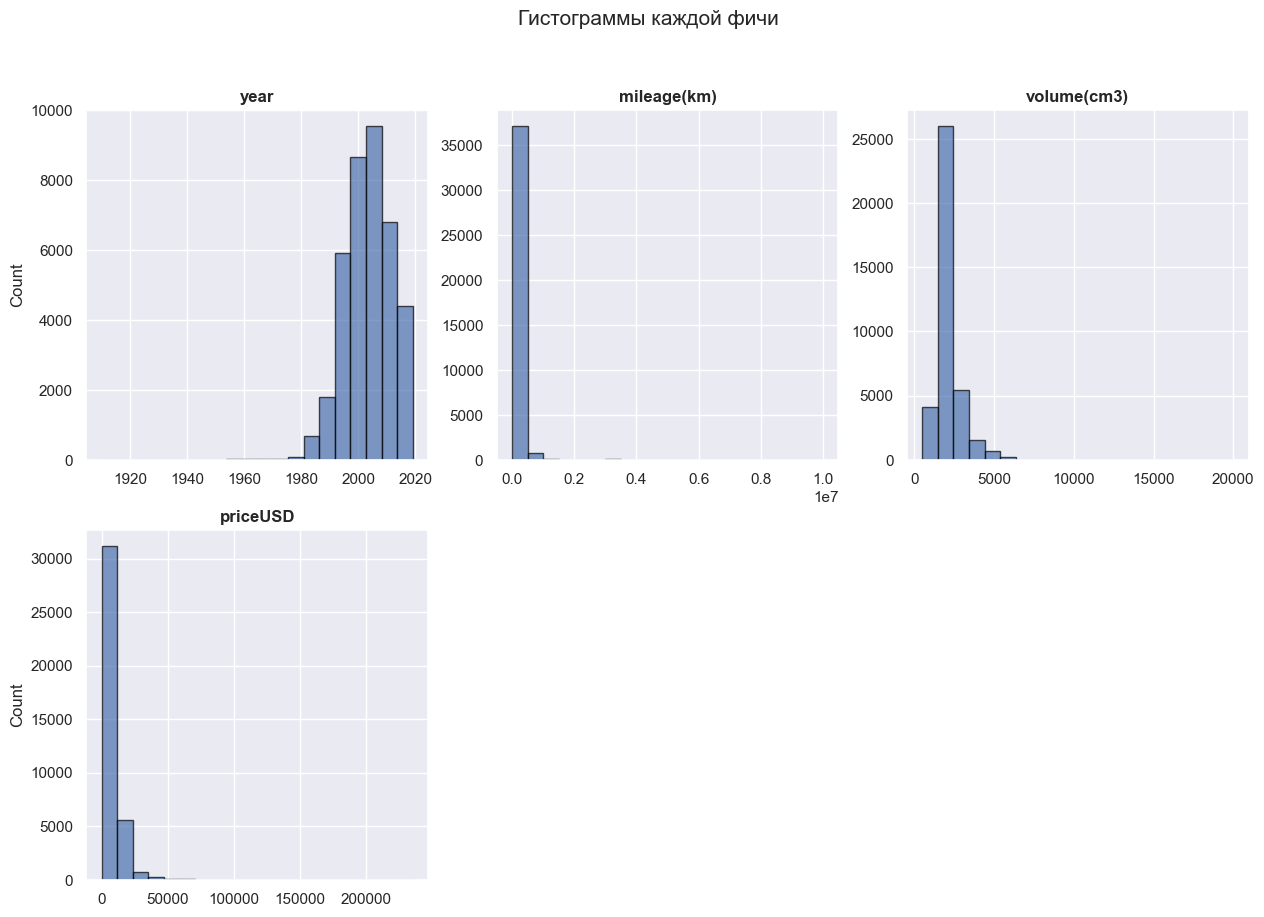

In [10]:
histmaker_for_numeric_df(df)

## посмотрел на датасет, далее смотрю на NaN и дропаю дубликаты, чтобы не завышать результаты на трейне

In [13]:
df.isna().sum()

company                  0
model                    0
year                     0
condition                0
mileage(km)              0
fuel                     0
volume(cm3)              0
color                    0
transmission             0
drive_unit               0
vehicle_size_class    3571
priceUSD                 0
dtype: int64

In [14]:
df = df.drop_duplicates()
df

,company,model,year,condition,mileage(km),fuel,volume(cm3),color,transmission,drive_unit,vehicle_size_class,priceUSD
0,renault,laguna,2000,with mileage,230000.0,petrol,1800.0,blue,mechanics,front-wheel drive,D,2300
1,chrysler,pacifica,2005,with mileage,310000.0,petrol,3500.0,black,auto,front-wheel drive,NaN,6300
2,mercedes-benz,c-klass,2010,with mileage,115000.0,petrol,1800.0,gray,auto,rear drive,D,11200
3,hyundai,accent,2017,with mileage,45500.0,petrol,1400.0,gray,auto,front-wheel drive,B,10886
4,renault,kadjar,2016,with mileage,139000.0,diesel,1500.0,red,auto,front-wheel drive,J,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
38000,renault,laguna,1999,with mileage,314000.0,petrol,1600.0,green,mechanics,front-wheel drive,D,1999
38001,opel,insignia,2010,with mileage,230000.0,petrol,1600.0,black,mechanics,front-wheel drive,D,7606
38002,kia,optima,2012,with mileage,115000.0,petrol,2400.0,black,mechanics,front-wheel drive,D,11850
38003,volkswagen,vento,1994,with mileage,300000.0,diesel,1900.0,white,mechanics,front-wheel drive,NaN,1200


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37966 entries, 0 to 38004
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             37966 non-null  object 
 1   model               37966 non-null  object 
 2   year                37966 non-null  int64  
 3   condition           37966 non-null  object 
 4   mileage(km)         37966 non-null  float64
 5   fuel                37966 non-null  object 
 6   volume(cm3)         37966 non-null  float64
 7   color               37966 non-null  object 
 8   transmission        37966 non-null  object 
 9   drive_unit          37966 non-null  object 
 10  vehicle_size_class  34400 non-null  object 
 11  priceUSD            37966 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.8+ MB


In [17]:
def plot_2_error(y_true, y_predicted):
    residuals = (y_true - y_predicted)/y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    neg_prices_count = sum(y_predicted < 0)

    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')
    print("   Negative Price Predictions Count:", neg_prices_count)
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black", alpha=0.25)
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red", alpha=0.25)
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

## листы с фичами

In [18]:
cat_features = ['company', 'model', 'condition', 'fuel', 'color', 'transmission', 'drive_unit' , 'vehicle_size_class']
num_features = ['year', 'mileage(km)', 'volume(cm3)']

## делю на тест и трейн

In [19]:
y = np.array(df.priceUSD)
X = df.drop(columns=['priceUSD'])

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

## пайплайн для категориальных фич: использую onehot encoder, да, даммирование очень сильно увеличит количество столбцов, но при использовании Label encoder и Ordinal в решетках вылетали nan

In [21]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore' ,  sparse_output=False))
])

## пайплайн для числовых фич, ставлю робаст, потому что хуже он точно не сделает

In [22]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

## колумн трансформер, столбцы не дропал: была мысль убрать vehicle_size_class , но резульаты с этой фичей были немного лучше, чем без неё, но если бы захотел дропнуть, то remainder = 'drop' убрал бы лишние фичи, которые не лежат в листах

In [23]:
CT = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_pipeline, cat_features)
    ] , remainder='drop').set_output(transform='pandas')

In [24]:
CT

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['year', 'mileage(km)', 'volume(cm3)']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['company', 'model', 'condition', 'fuel',
                                  'color', 'transmission', 'drive_unit',
                                  'vehicle_size_class'])])

In [25]:
ct = CT.fit_transform(X_train)

In [26]:
ct

,num__year,num__mileage(km),num__volume(cm3),cat__company_acura,cat__company_alfa-romeo,cat__company_aro,cat__company_aston-martin,cat__company_audi,cat__company_bentley,cat__company_bmw,...,cat__vehicle_size_class_A,cat__vehicle_size_class_B,cat__vehicle_size_class_C,cat__vehicle_size_class_D,cat__vehicle_size_class_E,cat__vehicle_size_class_F,cat__vehicle_size_class_J,cat__vehicle_size_class_M,cat__vehicle_size_class_S,cat__vehicle_size_class_Unknown
29764,0.750000,-0.558140,-0.851429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6131,-0.166667,0.500000,0.005714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28486,-0.750000,-0.208600,0.005714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20794,0.250000,0.122093,2.148571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3322,-0.250000,-0.151163,-0.422857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32468,-0.416667,-0.168605,-0.708571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1712,-1.166667,1.284884,0.005714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1785,0.333333,-0.244186,4.720000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18945,0.083333,0.837209,0.720000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## пайплайн для RF

In [27]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', RandomForestRegressor(n_estimators=500))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe  

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       RandomForestRegressor(n_estimators=500))]),
                                            transformer=PowerTransformer()))])

## данных много, поэтому финальные решетки будут небольшие

In [28]:
param_grid = {
    'model__regressor__estimator__max_depth': [None, 10, 20],
    'model__regressor__estimator__min_samples_split': [2, 5],
    'model__regressor__estimator__min_samples_leaf': [1, 2,4],
    'model__regressor__estimator__max_features': [1.0, 'sqrt']
}

## кросс-валидация, использую KFold

In [29]:
cv = KFold(n_splits=5, shuffle=True)

## решетка для параметров случайного леса, метрика - MAPE

In [30]:
scores='neg_mean_absolute_percentage_error'
grid_2 = GridSearchCV(model_pipe , n_jobs=-1, param_grid=param_grid, cv=cv, scoring=scores)
grid_2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('num',
                                                                                                                               Pipeline(steps=[('imputer',
                                                                                                                                                SimpleImputer(strategy='median')),
                                                                                                                                               ('scaler',
                                                                                                                                                RobustScaler())]),
                                                                                                                               ['year',
                                                                                                                                'mileage(km)',
                                                                                                                                'volume(cm3)']),...
                                                                                              RandomForestRegressor(n_estimators=500))]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid={'model__regressor__estimator__max_depth': [None, 10,
                                                                    20],
                         'model__regressor__estimator__max_features': [1.0,
                                                                       'sqrt'],
                         'model__regressor__estimator__min_samples_leaf': [1, 2,
                                                                           4],
                         'model__regressor__estimator__min_samples_split': [2,
                                                                            5]},
             scoring='neg_mean_absolute_percentage_error')

In [31]:
final = grid_2.best_estimator_

In [32]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,1,0,25,24,3,2,27,26,5,4,...,33,32,35,34,21,18,19,23,20,22
mean_fit_time,862.279206,912.769087,765.609344,808.146681,833.496083,870.691731,768.346635,769.629174,769.95278,748.442821,...,92.855507,94.080889,58.757561,76.965263,52.531886,52.713308,46.560136,51.076157,49.747537,44.363867
std_fit_time,41.041552,8.528089,14.799324,8.467486,13.692083,7.537811,7.698424,6.175878,9.681351,7.330661,...,4.186204,2.204256,7.821073,1.608072,3.147,1.265683,0.774391,4.190896,2.574198,1.754355
mean_score_time,4.199022,7.672563,2.731532,3.059902,3.656211,3.238424,2.531096,2.440863,2.582555,2.682707,...,1.760977,1.929761,0.692625,1.446046,1.374049,1.094158,1.047003,1.177685,1.13223,1.08177
std_score_time,0.852626,0.906553,0.078085,0.212294,0.600375,0.496953,0.117006,0.186279,0.087568,0.272392,...,0.137207,0.18675,0.108281,0.106939,0.181231,0.172376,0.104477,0.054986,0.229273,0.235422
param_model__regressor__estimator__max_depth,None,None,20,20,None,None,20,20,None,None,...,20,20,20,20,10,10,10,10,10,10
param_model__regressor__estimator__max_features,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt
param_model__regressor__estimator__min_samples_leaf,1,1,1,1,2,2,2,2,4,4,...,2,2,4,4,2,1,1,4,2,4
param_model__regressor__estimator__min_samples_split,5,2,5,2,5,2,5,2,5,2,...,5,2,5,2,5,2,5,5,2,2
params,{'model__regressor__estimator__max_depth': Non...,{'model__regressor__estimator__max_depth': Non...,"{'model__regressor__estimator__max_depth': 20,...","{'model__regressor__estimator__max_depth': 20,...",{'model__regressor__estimator__max_depth': Non...,{'model__regressor__estimator__max_depth': Non...,"{'model__regressor__estimator__max_depth': 20,...","{'model__regressor__estimator__max_depth': 20,...",{'model__regressor__estimator__max_depth': Non...,{'model__regressor__estimator__max_depth': Non...,...,"{'model__regressor__estimator__max_depth': 20,...","{'model__regressor__estimator__max_depth': 20,...","{'model__regressor__estimator__max_depth': 20,...","{'model__regressor__estimator__max_depth': 20,...","{'model__regressor__estimator__max_depth': 10,...","{'model__regressor__estimator__max_depth': 10,...","{'model__regressor__estimator__max_depth': 10,...","{'model__regressor__estimator__max_depth': 10,...","{'model__regressor__estimator__max_depth': 10,...","{'model__regressor__estimator__max_depth': 10,..."
split0_test_score,-0.221984,-0.223024,-0.22439,-0.223875,-0.228303,-0.228633,-0.229935,-0.23005,-0.237513,-0.237305,...,-0.495338,-0.505313,-0.521442,-0.527394,-0.699508,-0.708951,-0.738029,-0.72655,-0.710552,-0.728357


## 22,4 % на кросс-валидации и 21.92 на тесте,хороший результат, нет отрицательных цен, небольшой макс еррор

Max Error: 8
 
----------------------
   MAPE Error: 21.92
----------------------
   Negative Price Predictions Count: 0
----------------------


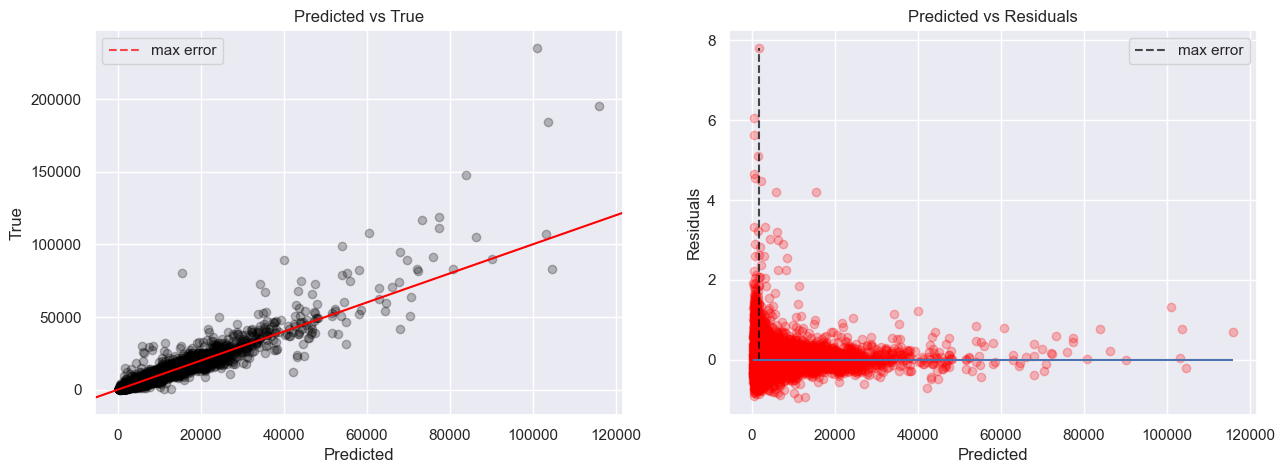

In [33]:
final.fit(X_train, y_train)
plot_2_error(y_test, final.predict(X_test))

In [34]:
final

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       RandomForestRegressor(min_samples_split=5,
                                                                                             n_estimators=500))]),
                                            transformer=PowerTransformer()))])

In [35]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', RandomForestRegressor(n_estimators=500 , max_depth = None , max_features = 1.0 ,min_samples_leaf = 1 ,min_samples_split=5))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe  

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       RandomForestRegressor(min_samples_split=5,
                                                                                             n_estimators=500))]),
                                            transformer=PowerTransformer()))])

## пайплайн для бустинга

In [38]:
model_pipe_gb = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', GradientBoostingRegressor(n_estimators=500))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe_gb

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       GradientBoostingRegressor(n_estimators=500))]),
                                            transformer=PowerTransformer()))])

In [40]:
param_grid_gb = {
    'model__regressor__estimator__learning_rate': [0.01, 0.1, 0.2],
    'model__regressor__estimator__max_depth': [3, 5, 7],
    'model__regressor__estimator__min_samples_split': [2, 4],
    'model__regressor__estimator__min_samples_leaf': [1, 2]
}

In [41]:
grid_2 = GridSearchCV(model_pipe_gb , n_jobs=-1, param_grid=param_grid_gb, cv=cv, scoring=scores)
grid_2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('num',
                                                                                                                               Pipeline(steps=[('imputer',
                                                                                                                                                SimpleImputer(strategy='median')),
                                                                                                                                               ('scaler',
                                                                                                                                                RobustScaler())]),
                                                                                                                               ['year',
                                                                                                                                'mileage(km)',
                                                                                                                                'volume(cm3)']),...
                                                                                              GradientBoostingRegressor(n_estimators=500))]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=-1,
             param_grid={'model__regressor__estimator__learning_rate': [0.01,
                                                                        0.1,
                                                                        0.2],
                         'model__regressor__estimator__max_depth': [3, 5, 7],
                         'model__regressor__estimator__min_samples_leaf': [1,
                                                                           2],
                         'model__regressor__estimator__min_samples_split': [2,
                                                                            4]},
             scoring='neg_mean_absolute_percentage_error')

In [42]:
final_gb = grid_2.best_estimator_

In [43]:
grid_result_gb = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_gb

,30,31,22,23,35,34,21,28,20,29,...,9,11,6,7,4,5,3,2,0,1
mean_fit_time,485.8203,461.867469,634.934089,641.810227,586.643864,643.068913,631.211224,460.473439,632.000604,468.836171,...,546.352839,534.425261,418.81264,419.610032,410.801405,416.367209,271.202519,268.922533,281.673777,277.834318
std_fit_time,6.830655,9.863349,8.177622,4.788862,24.101804,7.856396,5.202936,4.276297,4.022608,15.951853,...,5.22408,6.434855,2.206978,2.935755,6.026401,4.542667,1.856466,2.660812,3.698768,5.02146
mean_score_time,0.607222,0.595376,0.665164,0.590032,0.441616,0.661602,0.718533,0.597599,0.693144,0.57915,...,0.940078,0.729304,0.712831,0.747748,0.691305,0.741188,0.486598,0.497782,0.498772,0.48221
std_score_time,0.079009,0.085547,0.098546,0.021396,0.139257,0.081178,0.113042,0.065778,0.085585,0.033431,...,0.16554,0.087665,0.052134,0.079697,0.06098,0.044142,0.042815,0.058199,0.06279,0.054079
param_model__regressor__estimator__learning_rate,0.2,0.2,0.1,0.1,0.2,0.2,0.1,0.2,0.1,0.2,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
param_model__regressor__estimator__max_depth,5,5,7,7,7,7,7,5,7,5,...,7,7,5,5,5,5,3,3,3,3
param_model__regressor__estimator__min_samples_leaf,2,2,2,2,2,2,1,1,1,1,...,1,2,2,2,1,1,2,2,1,1
param_model__regressor__estimator__min_samples_split,2,4,2,4,4,2,4,2,2,4,...,4,4,2,4,2,4,4,2,2,4
params,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...,{'model__regressor__estimator__learning_rate':...
split0_test_score,-0.209725,-0.209998,-0.212238,-0.212396,-0.212937,-0.212892,-0.213794,-0.212309,-0.214479,-0.211613,...,-0.241782,-0.241112,-0.266131,-0.266105,-0.266261,-0.26638,-0.320137,-0.320137,-0.320616,-0.320616


## 21% на кросс-валидации и на тесте - отлично, макс еррор побольше, отрицательных цен нет

Max Error: 25
 
----------------------
   MAPE Error: 21.00
----------------------
   Negative Price Predictions Count: 0
----------------------


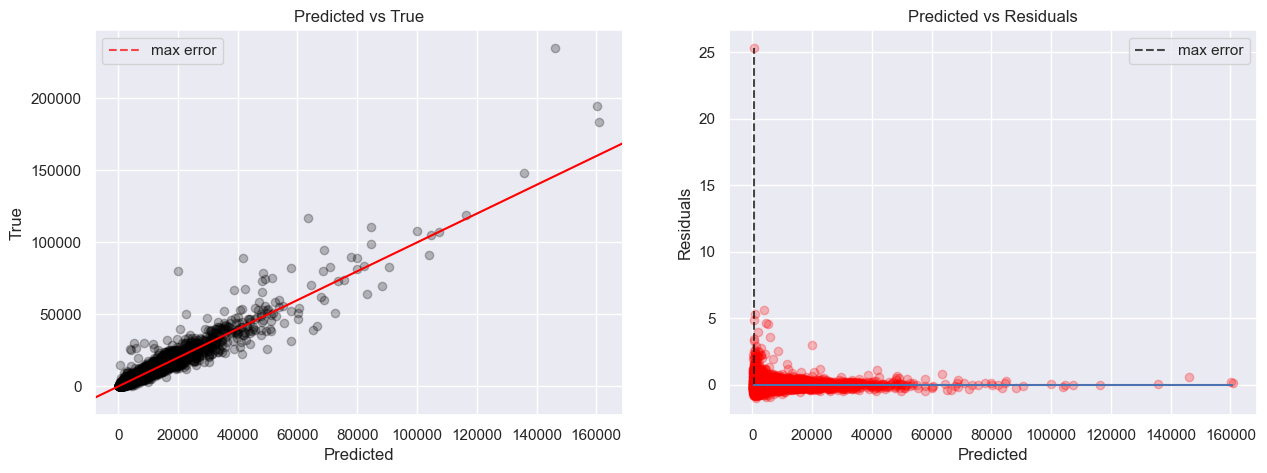

In [45]:
final_gb.fit(X_train, y_train)
plot_2_error(y_test, final_gb.predict(X_test))

In [46]:
final

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       RandomForestRegressor(min_samples_split=5,
                                                                                             n_estimators=500))]),
                                            transformer=PowerTransformer()))])

In [47]:
final_gb

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       GradientBoostingRegressor(learning_rate=0.2,
                                                                                                 max_depth=5,
                                                                                                 min_samples_leaf=2,
                                                                                                 n_estimators=500))]),
                                            transformer=PowerTransformer()))])

## пайплайн для SVR

In [51]:
model_pipe_svr = Pipeline([
    ('model', TransformedTargetRegressor(
            regressor=Pipeline(steps=[
                ('preproc', CT),
                ('estimator', SVR())
            ]),
            transformer=PowerTransformer(),
            check_inverse=False)
    )
])
model_pipe_svr

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       SVR())]),
                                            transformer=PowerTransformer()))])

In [52]:
param_grid_svr = {
    'model__regressor__estimator__C': [0.1, 1, 10],
    'model__regressor__estimator__kernel': ['rbf', 'linear'],
    'model__regressor__estimator__gamma': ['scale', 'auto'],
    'model__regressor__estimator__epsilon': [0.01, 0.1, 0.2]
}

In [53]:
grid_svr = GridSearchCV(model_pipe_svr , n_jobs=-1, param_grid=param_grid_svr, cv=cv, scoring=scores)
grid_svr.fit(X_train, y_train)

KeyboardInterrupt: 

## почему-то решетка с svr не отработала, но ладно, попробую использовать модель из коробки, да, параметры могут улучшить результаты, но в большей степени на качество модели влияет предобработка данных, так что даже базовый svr может выдать неплохие результаты

In [ ]:
final_svr = grid_svr.best_estimator_

In [ ]:
grid_result_svr = pd.DataFrame(grid_svr.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_svr

In [ ]:
final_svr.fit(X_train, y_train)
plot_2_error(y_test, final_svr.predict(X_test))

In [55]:
model_pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       SVR())]),
                                            transformer=PowerTransformer()))])

## хороший результат

Max Error: 20
 
----------------------
   MAPE Error: 21.70
----------------------
   Negative Price Predictions Count: 0
----------------------


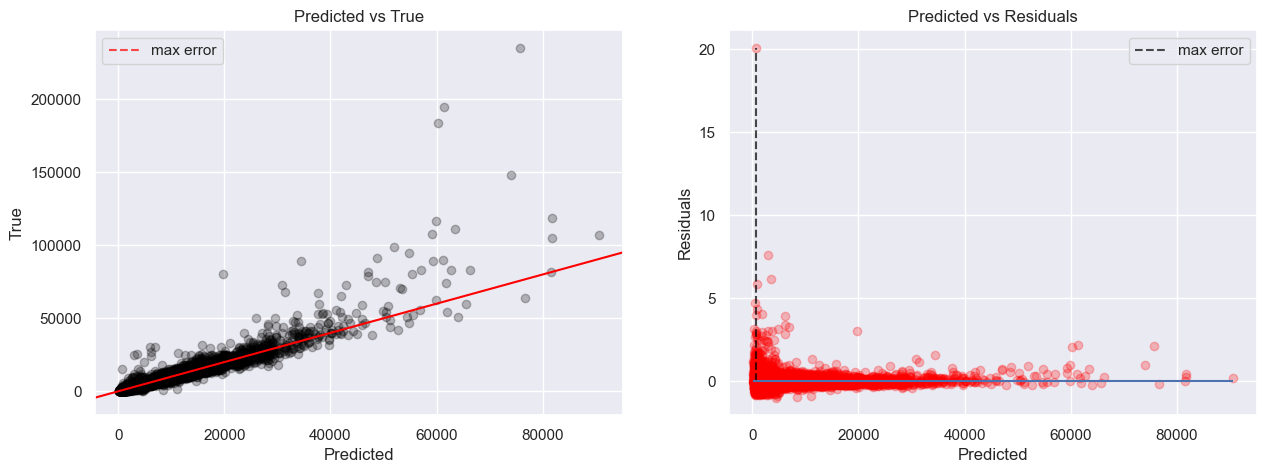

In [56]:
plot_2_error(y_test, model_pipe_svr.predict(X_test))

## все 3 модели очень даже неплохо работают, поэтому объединю их в войтинг, возможно результат улучшится

In [58]:
voiting = VotingRegressor([('rf', final ), ('gb', final_gb), ('svr', model_pipe_svr)])

In [59]:
voiting.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         regressor=Pipeline(steps=[('preproc',
                                                                                                    ColumnTransformer(transformers=[('num',
                                                                                                                                     Pipeline(steps=[('imputer',
                                                                                                                                                      SimpleImputer(strategy='median')),
                                                                                                                                                     ('scaler',
                                                                                                                                                      RobustScaler())]),
                                                                                                                                     ['year',
                                                                                                                                      'mileage(km)',
                                                                                                                                      'volume(cm3)']),
                                                                                                                                    ('cat',
                                                                                                                                     Pipeline(steps=[('imputer',
                                                                                                                                                      SimpleI...
                                                                                                                                      'mileage(km)',
                                                                                                                                      'volume(cm3)']),
                                                                                                                                    ('cat',
                                                                                                                                     Pipeline(steps=[('imputer',
                                                                                                                                                      SimpleImputer(fill_value='Unknown',
                                                                                                                                                                    strategy='constant')),
                                                                                                                                                     ('onehot',
                                                                                                                                                      OneHotEncoder(handle_unknown='ignore',
                                                                                                                                                                    sparse_output=False))]),
                                                                                                                                     ['company',
                                                                                                                                      'model',
                                                                                                                                      'condition',
                                       

## Прекрасно, max error усреднен, mape наилучший, Без отрицательных цен

Max Error: 15
 
----------------------
   MAPE Error: 20.62
----------------------
   Negative Price Predictions Count: 0
----------------------


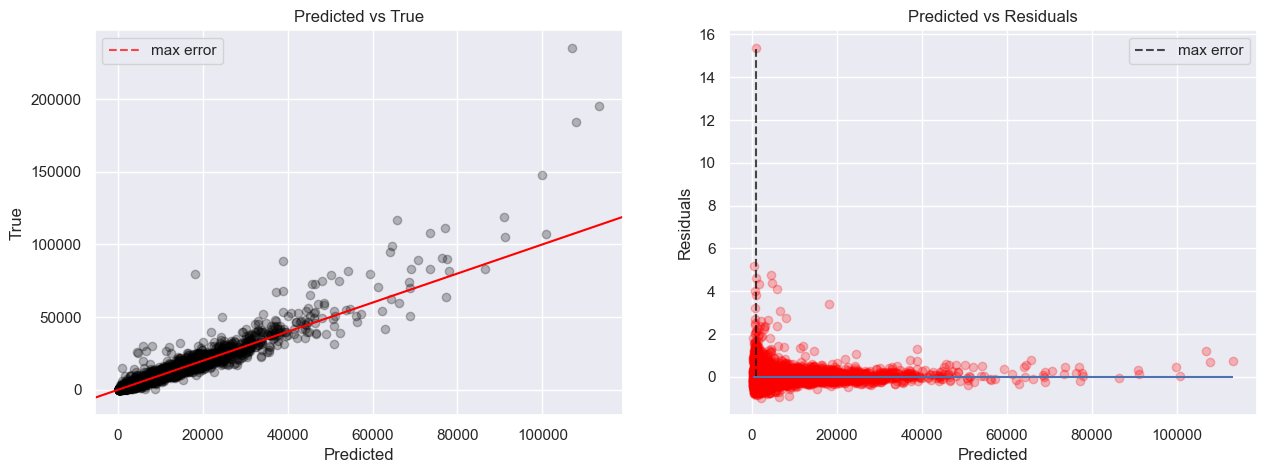

In [60]:
plot_2_error(y_test, voiting.predict(X_test))

In [62]:
base_models = [
    ('rf', final),  
    ('gb', final_gb),
    ('svr', model_pipe_svr)
]


In [65]:
meta_model = make_pipeline(RobustScaler(), Ridge(alpha=1.0))

In [68]:
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True
)

In [69]:
stacked_model.fit(X_train, y_train)

KeyboardInterrupt: 

## то ли долго работал, то ли не зафитился, но ладно, остановлюсь на войтинге, также просмотрю регрессии ридж, лассо, еластик нет

In [82]:
model_pipe_ridge = Pipeline([
    ('model', TransformedTargetRegressor(
            regressor=Pipeline(steps=[
                ('preproc', CT),
                ('estimator',  Ridge(alpha=1))
            ]),
            transformer=PowerTransformer(),
            check_inverse=False)
    )
])
model_pipe_ridge

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       Ridge(alpha=1))]),
                                            transformer=PowerTransformer()))])

In [83]:
model_pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       Ridge(alpha=1))]),
                                            transformer=PowerTransformer()))])

Max Error: 37
 
----------------------
   MAPE Error: 23.37
----------------------
   Negative Price Predictions Count: 1
----------------------


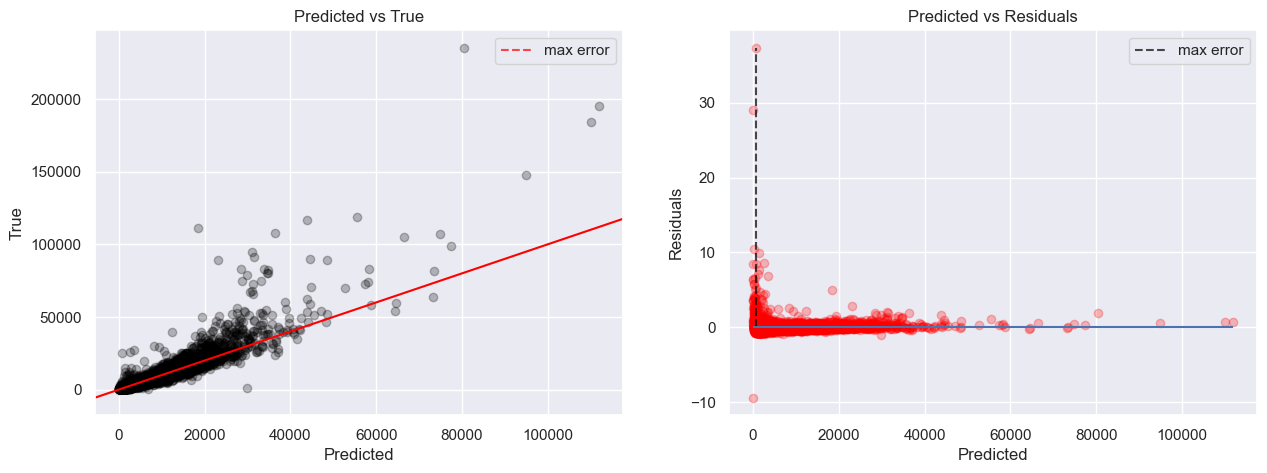

In [84]:
plot_2_error(y_test, model_pipe_ridge.predict(X_test))

In [85]:
model_pipe_lasso = Pipeline([
    ('model', TransformedTargetRegressor(
            regressor=Pipeline(steps=[
                ('preproc', CT),
                ('estimator',  Lasso())
            ]),
            transformer=PowerTransformer(),
            check_inverse=False)
    )
])
model_pipe_lasso

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       Lasso())]),
                                            transformer=PowerTransformer()))])

Max Error: 46
 
----------------------
   MAPE Error: 146.75
----------------------
   Negative Price Predictions Count: 0
----------------------


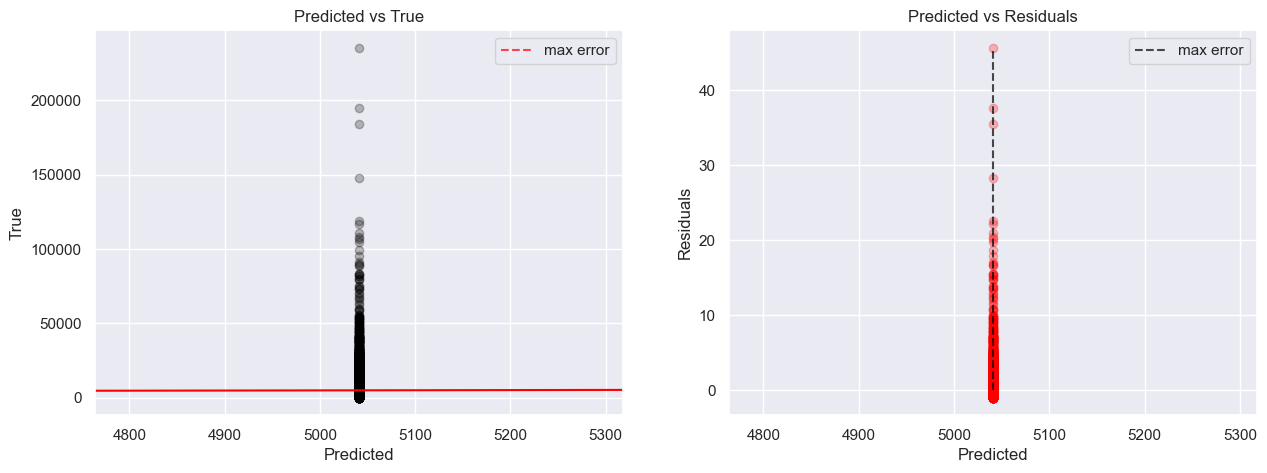

In [86]:
model_pipe_lasso.fit(X_train, y_train)
plot_2_error(y_test, model_pipe_lasso.predict(X_test))

In [87]:
model_pipe_en = Pipeline([
    ('model', TransformedTargetRegressor(
            regressor=Pipeline(steps=[
                ('preproc', CT),
                ('estimator',  ElasticNet())
            ]),
            transformer=PowerTransformer(),
            check_inverse=False)
    )
])
model_pipe_en

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       ElasticNet())]),
                                            transformer=PowerTransformer()))])

Max Error: 43
 
----------------------
   MAPE Error: 139.59
----------------------
   Negative Price Predictions Count: 0
----------------------


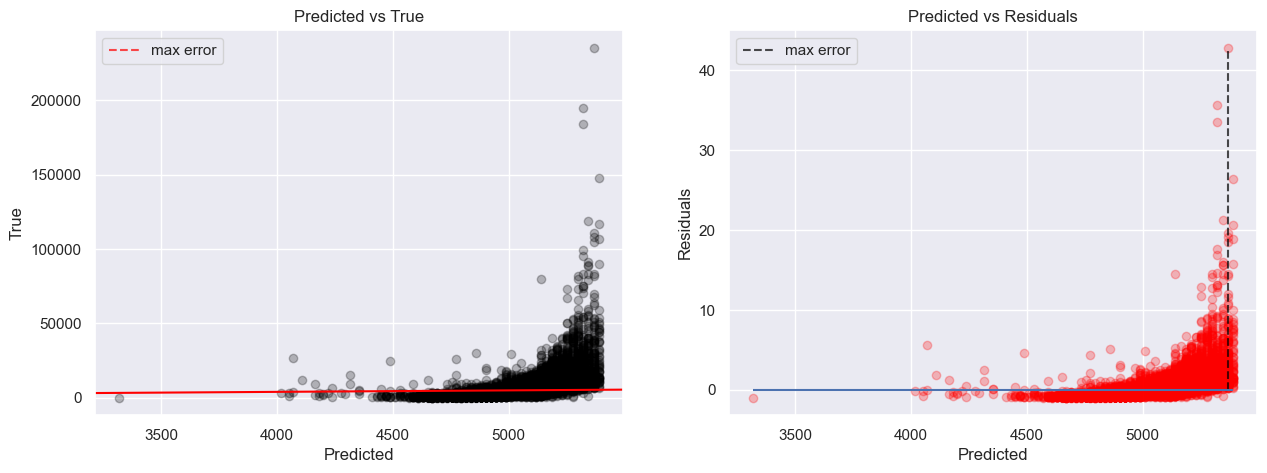

In [88]:
model_pipe_en.fit(X_train, y_train)
plot_2_error(y_test, model_pipe_en.predict(X_test))

Max Error: 37
 
----------------------
   MAPE Error: 23.37
----------------------
   Negative Price Predictions Count: 1
----------------------


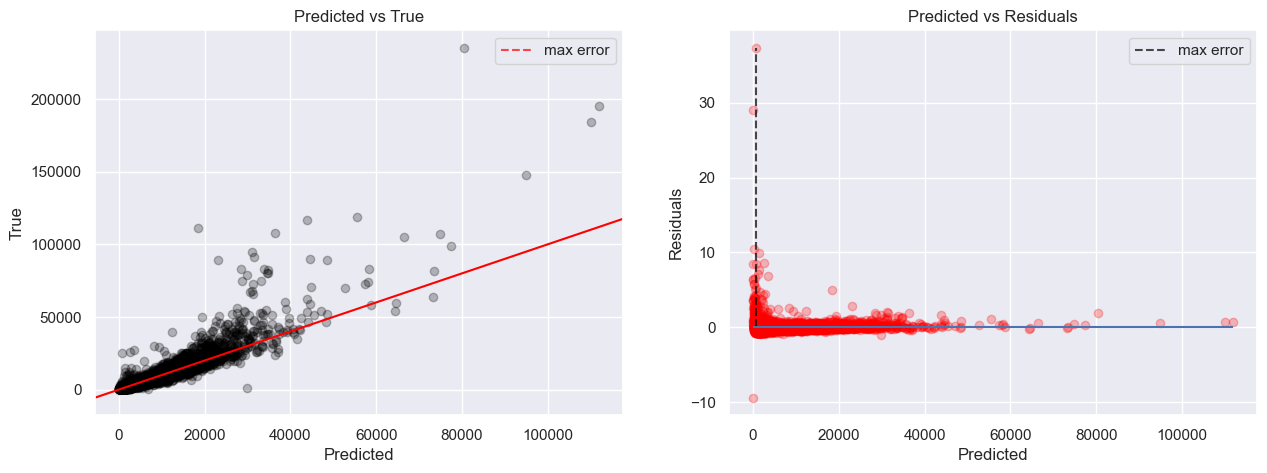

In [89]:
plot_2_error(y_test, model_pipe_ridge.predict(X_test))

In [90]:
model_pipe_gb_new = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', GradientBoostingRegressor(learning_rate=0.3, max_depth=5, min_samples_leaf=2,
                          n_estimators=500))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe_gb_new

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(strategy='median')),
                                                                                                                        ('scaler',
                                                                                                                         RobustScaler())]),
                                                                                                        ['year',
                                                                                                         'mileage(km)',
                                                                                                         'volume(cm3)']),
                                                                                                       ('cat',
                                                                                                        Pipeline(steps=[('imputer',
                                                                                                                         SimpleImputer(fill_value='Unknown',
                                                                                                                                       strategy='constant')),
                                                                                                                        ('onehot',
                                                                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                                                                       sparse_output=False))]),
                                                                                                        ['company',
                                                                                                         'model',
                                                                                                         'condition',
                                                                                                         'fuel',
                                                                                                         'color',
                                                                                                         'transmission',
                                                                                                         'drive_unit',
                                                                                                         'vehicle_size_class'])])),
                                                                      ('estimator',
                                                                       GradientBoostingRegressor(learning_rate=0.3,
                                                                                                 max_depth=5,
                                                                                                 min_samples_leaf=2,
                                                                                                 n_estimators=500))]),
                                            transformer=PowerTransformer()))])

Max Error: 21
 
----------------------
   MAPE Error: 21.02
----------------------
   Negative Price Predictions Count: 0
----------------------


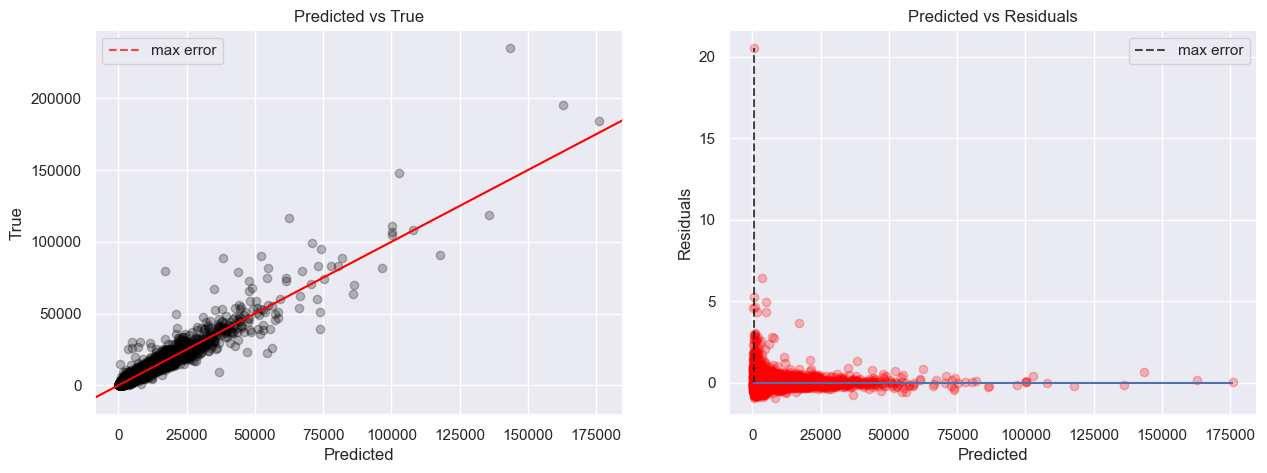

In [91]:
model_pipe_gb_new.fit(X_train, y_train)
plot_2_error(y_test, model_pipe_gb_new.predict(X_test))

## регрессии точно использовать не надо, выдают очень странные результаты и негативные цены, попробовал gb с бОльшим learning rate, mape подупал, не буду по итогу ничего менять: остановлюсь на войтинге с подобранными параметрами